In [68]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

首先检查一下数据的基本情况

In [70]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# info()显示Age、Cabin、Embarked有null值

In [72]:
train_df.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

# Cabin数据太少，没有明显相关性，

In [73]:
train_df.describe() #all numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 生存率38.4%
- 平均年龄29.7

In [74]:
train_df.describe(include=['O']) # all object columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [75]:
train_df.Pclass.value_counts() #counts of unique values.

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [76]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- Pclass=1的乘客生存率最高
- Pclass越高，乘客生存率越低
- Pclass与生存率相关，可以作为一个特征

In [77]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


- 女性乘客生存率很高
- Sex与生存率相关，可以作为一个特征

In [78]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0})
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train_df[['Name', 'Survived']]

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0
6,"McCarthy, Mr. Timothy J",0
7,"Palsson, Master. Gosta Leonard",0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1


In [80]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('(\w*)\.', expand=False)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [81]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [82]:
train_df[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [83]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [84]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    vc = dataset.Title.value_counts()
    topTitles = vc.index[:4].values
    rareTitles = vc.index[4:].values
    
    dataset['Title'] = dataset['Title'].replace(rareTitles, 'Rare')
    
    i = 0
    for title in np.append(topTitles, 'Rare'):
        dataset.loc[(dataset['Title'] == title), 'Title'] = i
        i += 1
        
    dataset['Title'] = dataset['Title'].astype(int)
    
train_df.Title.value_counts()

0    517
1    185
2    126
3     40
4     23
Name: Title, dtype: int64

In [85]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.156673
1,1,0.702703
2,2,0.793651
3,3,0.575000
4,4,0.347826


In [86]:
fig = plt.figure();
ax = fig.add_subplot(111)
ax.hist(train_df.Age.dropna(), bins=80)

(array([ 14.,  10.,   6.,  10.,   4.,   3.,   3.,   4.,   8.,   2.,   4.,
          1.,   2.,   6.,   6.,  17.,  13.,  26.,  25.,  15.,  25.,  27.,
         15.,  31.,  24.,  18.,  18.,  25.,  22.,  25.,  19.,  18.,  17.,
         15.,  19.,  22.,   7.,  11.,  14.,  13.,   8.,  13.,   5.,   9.,
         12.,   5.,   9.,   9.,   6.,  10.,   7.,   6.,   1.,   8.,   2.,
          5.,   2.,   5.,   2.,   4.,   3.,   4.,   2.,   2.,   3.,   1.,
          0.,   0.,   0.,   2.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  0.42   ,   1.41475,   2.4095 ,   3.40425,   4.399  ,   5.39375,
          6.3885 ,   7.38325,   8.378  ,   9.37275,  10.3675 ,  11.36225,
         12.357  ,  13.35175,  14.3465 ,  15.34125,  16.336  ,  17.33075,
         18.3255 ,  19.32025,  20.315  ,  21.30975,  22.3045 ,  23.29925,
         24.294  ,  25.28875,  26.2835 ,  27.27825,  28.273  ,  29.26775,
         30.2625 ,  31.25725,  32.252  ,  33.24675,  34.2415 ,  35.23625,
         3

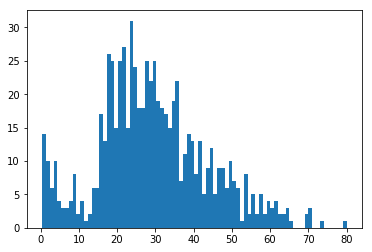

In [87]:
#fig = plt.figure()
#ax = fig.add_subplot(121)
#ax.hist(train_df.loc[train_df['Survived']==1].Age.dropna(), bins=20)
#ax = fig.add_subplot(122)
#ax.hist(train_df.loc[train_df['Survived']==0].Age.dropna(), bins=20)
plt.show()

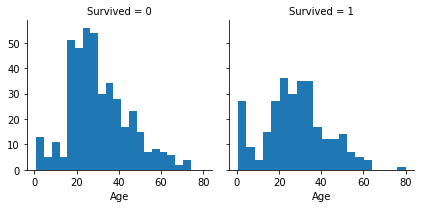

In [88]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

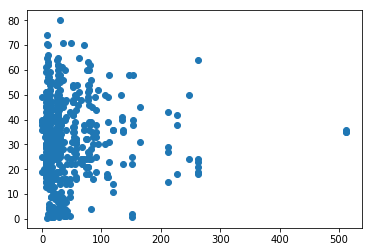

In [89]:
# g = sns.FaceGrid(train_df, col)
# plt.scatter(train_df.Age, train_df.Fare)
fig = plt.figure();
ax = fig.add_subplot(111)
ax.scatter(train_df.Fare, train_df.Age)
plt.show()

Fare与Age相关性貌似不高

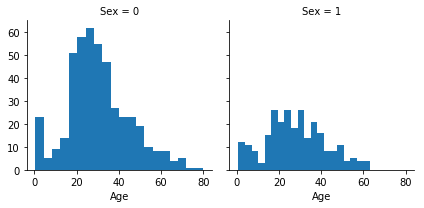

In [90]:
g = sns.FacetGrid(train_df, col='Sex')
g.map(plt.hist, 'Age', bins=20)
plt.show()

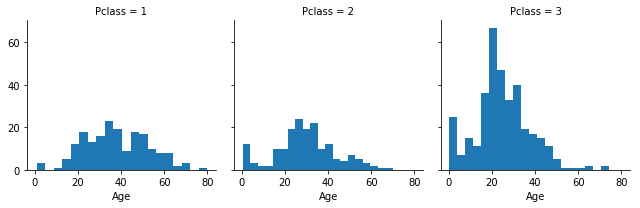

In [91]:
g = sns.FacetGrid(train_df, col='Pclass')
g.map(plt.hist, 'Age', bins=20)
plt.show()

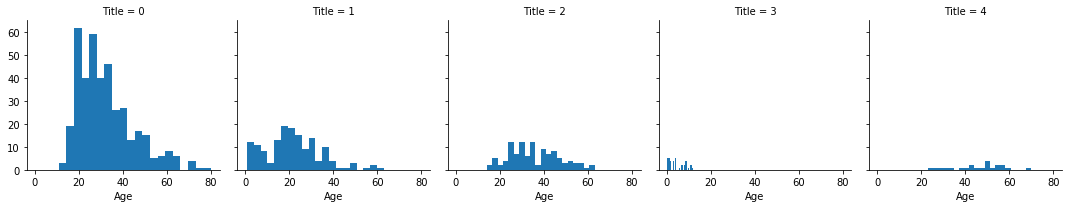

In [92]:
g = sns.FacetGrid(train_df, col='Title')
g.map(plt.hist, 'Age', bins=20)
plt.show()

In [93]:
# 利用Title补全age字段
for dataset in combine:
    titles = dataset.Title.unique()
    guess_ages = {}
    for title in titles:
        guess_ages[title] = dataset.loc[train_df['Title'] == title].Age.median()
    for title in titles:
        dataset.loc[dataset.Age.isnull() & (dataset.Title == title), 'Age'] = guess_ages[title] 

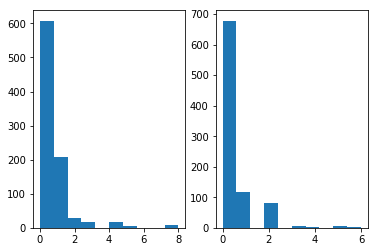

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(train_df.SibSp)
ax = fig.add_subplot(1,2,2)
ax.hist(train_df.Parch)
plt.show()

In [95]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [96]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [97]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [98]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [99]:
# 清理无用字段
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'SibSp', 'Parch', 'PassengerId', 'FamilySize'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket', 'Name', 'SibSp', 'Parch', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [100]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,0,2,0,1
1,893,3,1,47.0,0,0,2,0
2,894,2,0,62.0,1,2,0,1
3,895,3,0,27.0,1,0,0,1
4,896,3,1,22.0,1,0,2,0


In [101]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [102]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,0,0,0,0
1,1,1,1,38.0,3,1,2,0
2,1,3,1,26.0,1,0,1,1
3,1,1,1,35.0,3,0,2,0
4,0,3,0,35.0,1,0,0,1


In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
IsAlone     891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


# 开始预测

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
x_test = test_df.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [106]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
log_pred = logReg.predict(x_test)
acc_log = round(logReg.score(x_train, y_train) * 100, 2)
acc_log

80.25

In [107]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

86.76

In [108]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

86.08

In [109]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

77.55

In [110]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
linear_svc_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

80.92

In [111]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
prec_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

74.97

In [112]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

71.27

In [113]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

94.39

In [114]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)
# random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

94.39

In [115]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.39
8,Decision Tree,94.39
0,Support Vector Machines,86.76
1,KNN,86.08
7,Linear SVC,80.92
2,Logistic Regression,80.25
4,Naive Bayes,77.55
5,Perceptron,74.97
6,Stochastic Gradient Decent,71.27


In [116]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": dt_pred
})

In [118]:
submission
submission.to_csv('submission.csv', index=False)